<a href="https://colab.research.google.com/github/kdemertzis/EKPA/blob/main/Ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [3]:
#eξερεύνηση συνόλου δεδομένων
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [4]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [5]:
# ανακάτεμα δεδομένων
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,VirusShare_dd4ee052529d0930aad9d55e85140c67,dd4ee052529d0930aad9d55e85140c67,332,224,258,10,0,117248,389632,0,...,5,3.312743,2.674420,3.764385,2517.600000,48,7336,72,14,0
1,VirusShare_da719523bbf9107f8a376389796a0d66,da719523bbf9107f8a376389796a0d66,332,224,258,10,0,120320,385024,0,...,6,3.672881,2.458492,5.317552,2738.833333,48,9640,72,15,0
2,VirusShare_08109ce5d799b1461cbd6c9d60020777,08109ce5d799b1461cbd6c9d60020777,332,224,258,10,0,119808,385024,0,...,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15,0
3,VirusShare_c434341364256a9cac187732a1d02d5e,c434341364256a9cac187732a1d02d5e,332,224,271,6,0,23552,119808,1024,...,17,4.002255,2.521832,6.166077,1634.235294,132,9640,0,0,0
4,VirusShare_959b358d2a609f3e6283dee80fb9cfb9,959b358d2a609f3e6283dee80fb9cfb9,332,224,258,11,0,273408,242176,0,...,9,4.095638,1.769974,7.677091,12663.222222,16,81654,72,0,0


In [6]:
#tαξινόμηση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό
#0 legit, 1 ransomware
dataset.groupby(dataset['legitimate']).size()

,0
legitimate,
0,96724
1,41323


([<matplotlib.patches.Wedge at 0x7dd9ebe5efc0>,
 [Text(0.6484073680146373, 0.888576324861478, 'Malware'),
  Text(-0.6484076610757229, -0.8885761110103684, 'Legitimate')],
 [Text(0.3536767461898021, 0.4846779953789879, '30%'),
  Text(-0.35367690604130336, -0.48467787873292817, '70%')])

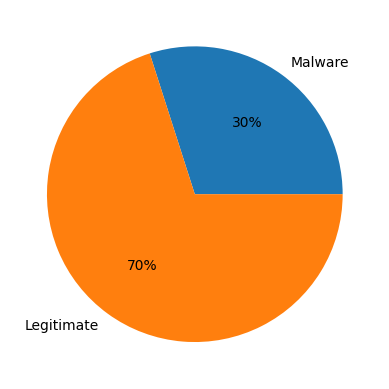

In [7]:
#γραφική απεικόνιση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό#
#0 legit, 1 ransomware
type_classify=['Malware', 'Legitimate']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

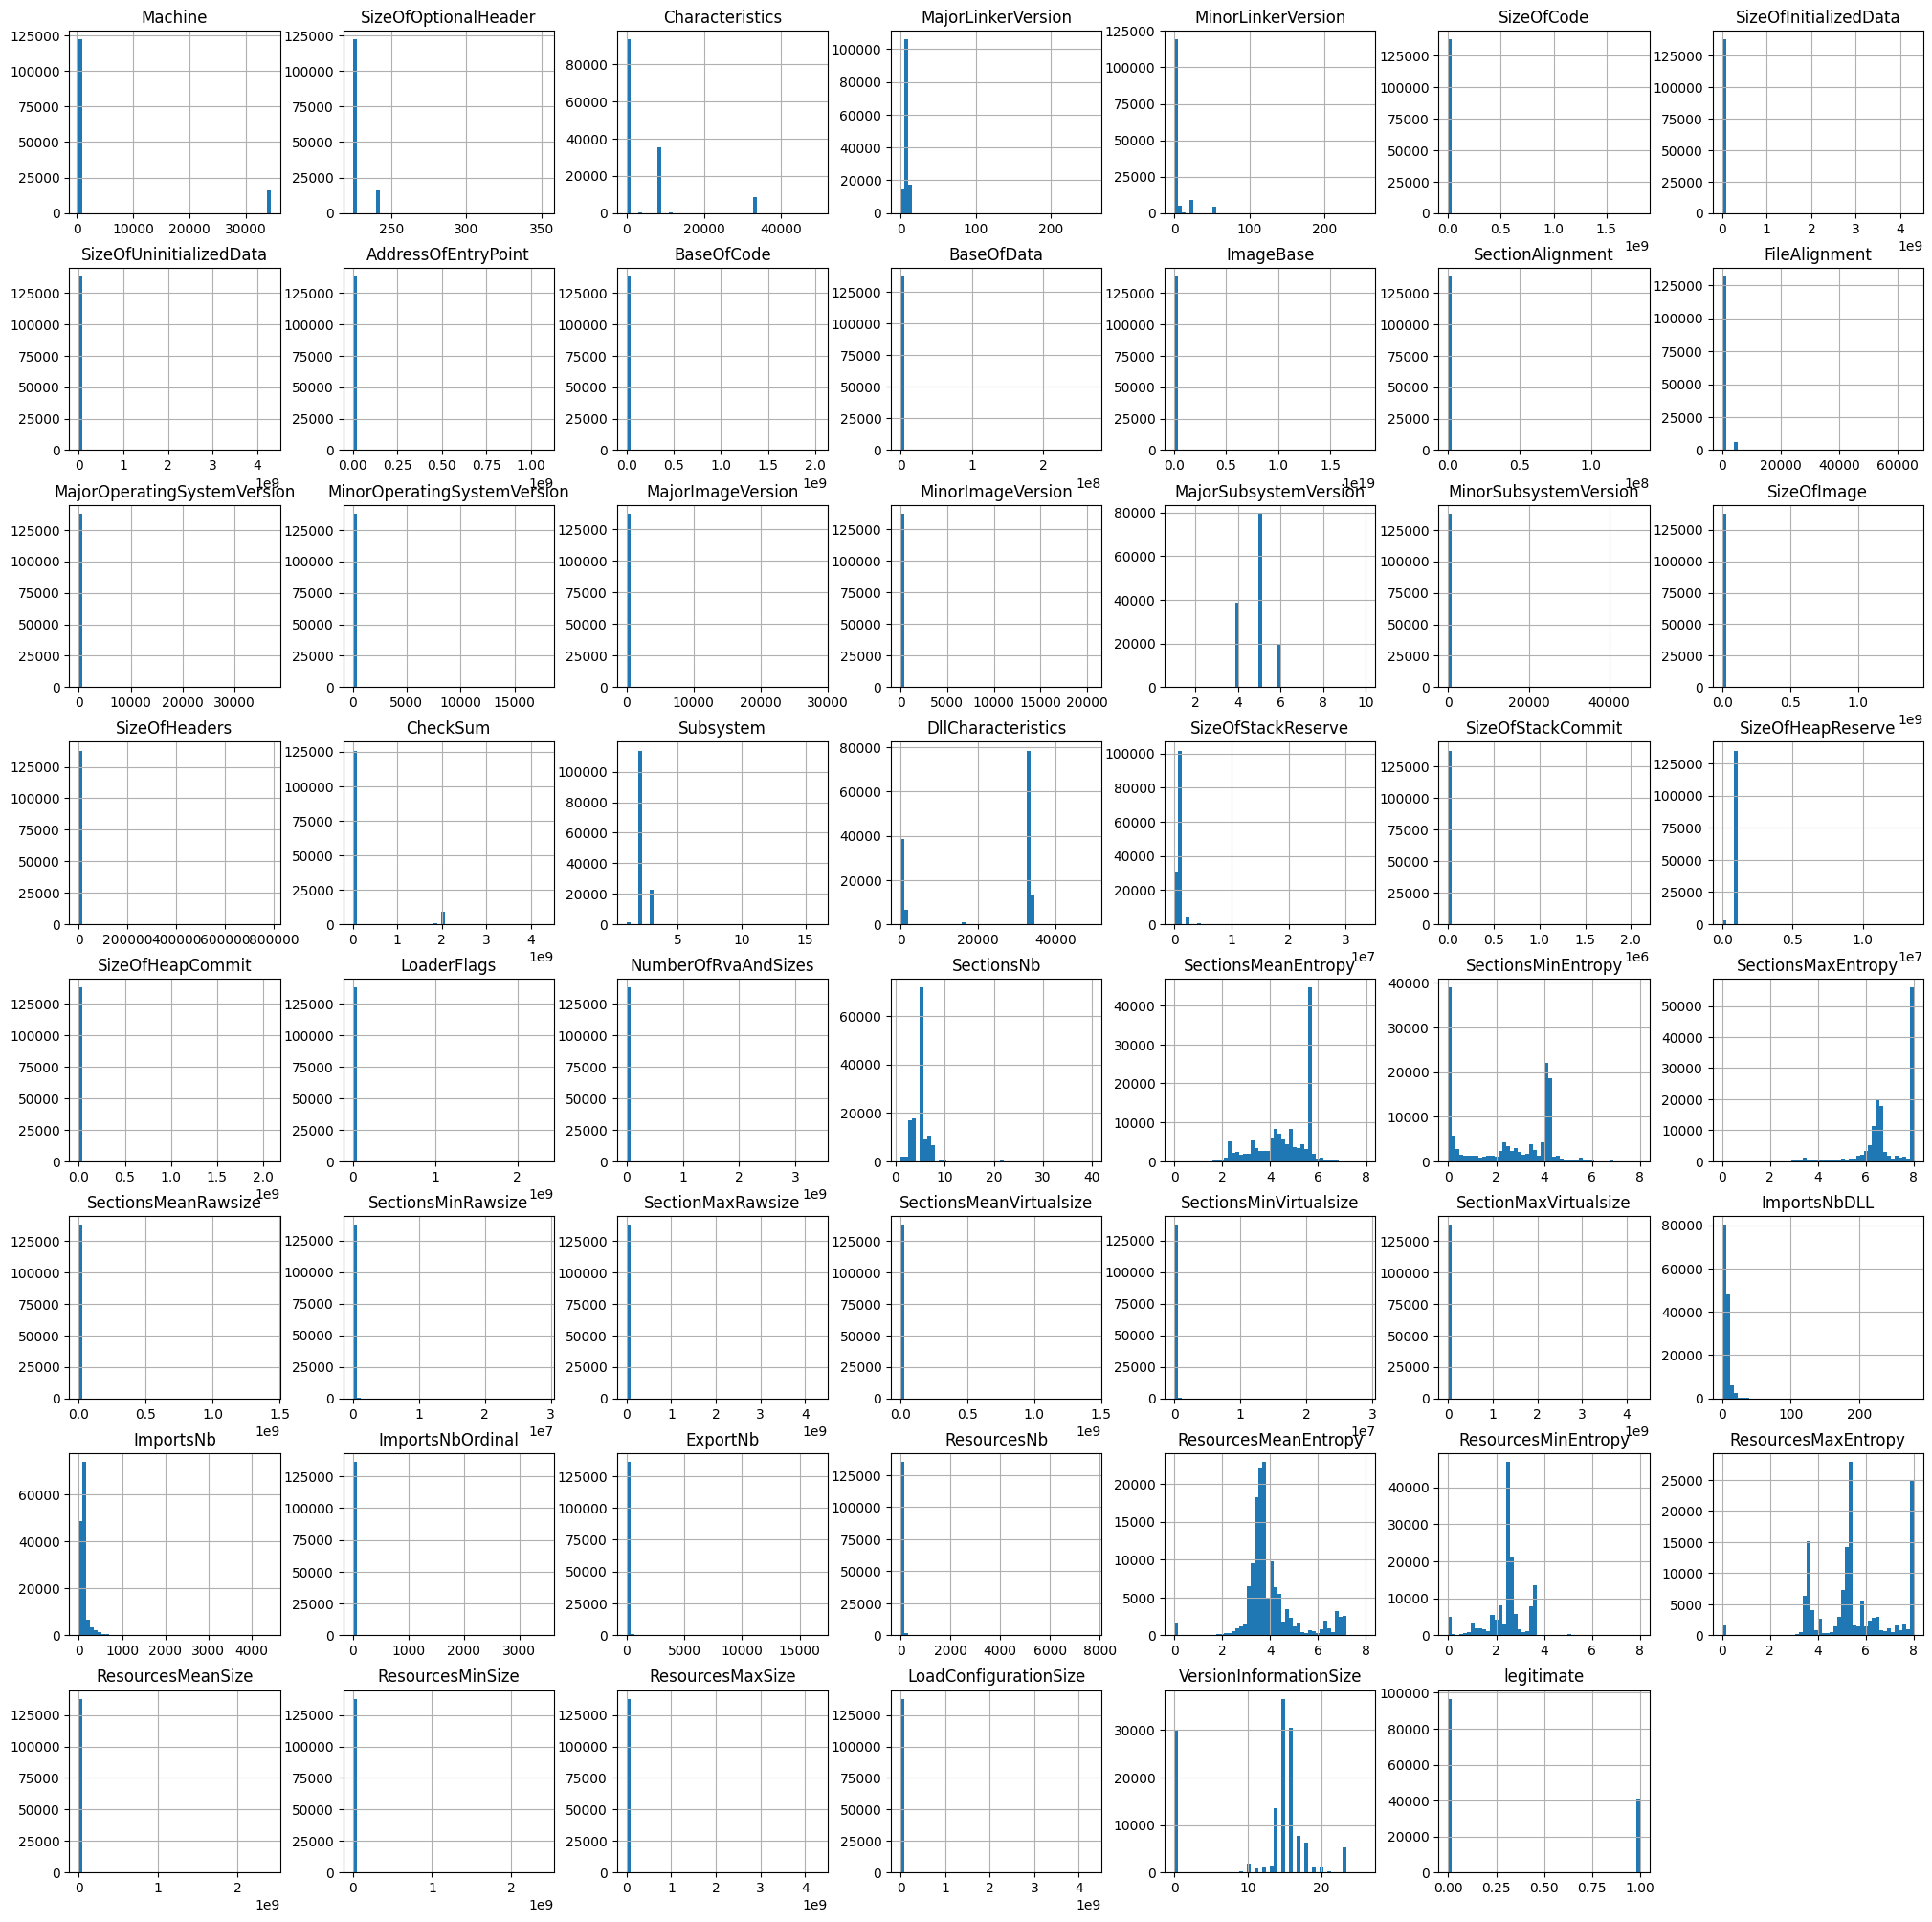

In [8]:
#οπτικοποίηση της κατανομής των δεδομένων
dataset.hist(bins = 50,figsize = (25,25))
plt.show()

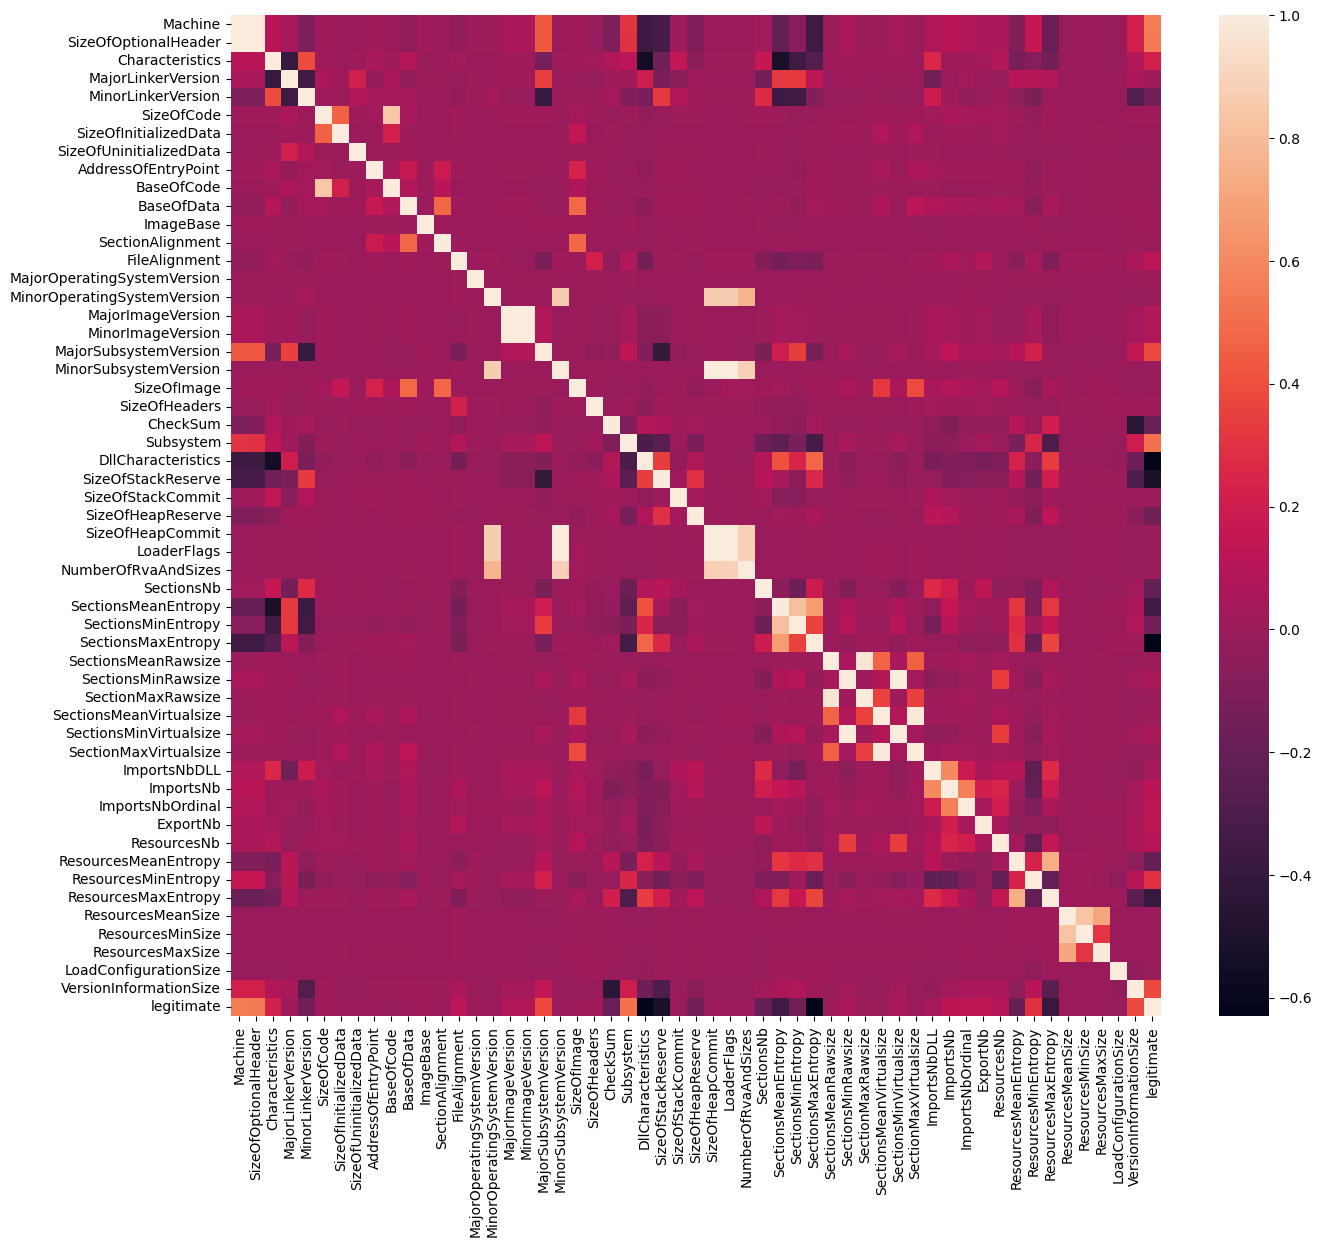

In [9]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))

#κρατάω μόνο αριθμητικές στήλες
sns.heatmap(dataset.select_dtypes(include=['int64', 'float64']).corr())


plt.show()

In [10]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

,0
Name,0
md5,0
Machine,0
SizeOfOptionalHeader,0
Characteristics,0
MajorLinkerVersion,0
MinorLinkerVersion,0
SizeOfCode,0
SizeOfInitializedData,0
SizeOfUninitializedData,0


In [11]:
# Ορισμός X και y
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [12]:
# Χειρισμός τιμών που λείπουν με στρατηγική "συμπλήρωση με σταθερή τιμή"
imputer = SimpleImputer(strategy='constant', fill_value='unknown')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_imputed

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,VirusShare_dd4ee052529d0930aad9d55e85140c67,dd4ee052529d0930aad9d55e85140c67,332,224,258,10,0,117248,389632,0,...,0,5,3.312743,2.67442,3.764385,2517.6,48,7336,72,14
1,VirusShare_da719523bbf9107f8a376389796a0d66,da719523bbf9107f8a376389796a0d66,332,224,258,10,0,120320,385024,0,...,0,6,3.672881,2.458492,5.317552,2738.833333,48,9640,72,15
2,VirusShare_08109ce5d799b1461cbd6c9d60020777,08109ce5d799b1461cbd6c9d60020777,332,224,258,10,0,119808,385024,0,...,0,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15
3,VirusShare_c434341364256a9cac187732a1d02d5e,c434341364256a9cac187732a1d02d5e,332,224,271,6,0,23552,119808,1024,...,0,17,4.002255,2.521832,6.166077,1634.235294,132,9640,0,0
4,VirusShare_959b358d2a609f3e6283dee80fb9cfb9,959b358d2a609f3e6283dee80fb9cfb9,332,224,258,11,0,273408,242176,0,...,0,9,4.095638,1.769974,7.677091,12663.222222,16,81654,72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_d9ba02fe2a3dd95b7512a559f449b950,d9ba02fe2a3dd95b7512a559f449b950,332,224,258,10,0,120320,385024,0,...,0,6,3.671986,2.458492,5.317552,2739.5,48,9640,72,15
138043,NETFXRepair.1036.dll,3affb76d25db0d165a968bcdbc5f3135,332,224,8482,10,0,0,2560,0,...,0,3,3.0085,2.413935,3.462211,614.666667,128,928,0,16
138044,VirusShare_eac4f0c062e157cd722ed6b3acfd9fb4,eac4f0c062e157cd722ed6b3acfd9fb4,332,224,33167,2,25,524288,28672,888832,...,0,259,4.735701,0.0,7.920188,2386.598456,16,206742,0,18
138045,VirusShare_b84bba48eb2a9abd351e25e4f5daeb43,b84bba48eb2a9abd351e25e4f5daeb43,332,224,258,10,0,118784,383488,0,...,0,16,6.378131,2.458492,7.992688,20821.9375,48,33945,72,14


In [13]:
# Ορίζουμε ένα LabelEncoder για κάθε στήλη με συμβολοσειρές
label_encoders = {}
for column in X_imputed.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    X_imputed[column] = label_encoders[column].fit_transform(X_imputed[column])

In [14]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(X_imputed)

In [15]:
# Επαναφορά των αρχικών τιμών συμβολοσειρών αν χρειαστεί
for column in X_imputed.select_dtypes(include='object').columns:
    X_imputed[column] = label_encoders[column].inverse_transform(X_imputed[column])

In [16]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [1 1 1 ... 1 1 1]


In [17]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(X_imputed[outliers != -1])
clean_data['legitimate'] = y[outliers != -1]

In [18]:
# Αναφορά του νέου συνόλου ανά κλάση
remaining_instances_report = clean_data['legitimate'].value_counts()
print("Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:\n", remaining_instances_report)

Αναφορά υπολοίπων περιπτώσεων ανά κατηγορία:
 legitimate
0    94378
1    36765
Name: count, dtype: int64


In [19]:
# Εκτύπωση καθαρού συνόλου
clean_data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,88255,119271,0,0,11,10,0,303,826,0,...,5,9665,3468,12671,8834,44,1824,1,8,0
1,86640,117180,0,0,11,10,0,309,819,0,...,6,24449,2649,16569,9161,44,2027,1,9,0
2,6776,3365,0,0,11,10,0,308,819,0,...,6,26200,2649,16569,9161,44,2027,1,9,0
3,73264,100253,0,0,18,6,0,95,287,4,...,17,29800,2834,18481,6951,107,2027,0,0,0
4,48585,68188,0,0,11,11,0,615,529,0,...,9,30954,1289,20393,13281,16,4133,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,86223,116653,0,0,11,10,0,309,819,0,...,6,24431,2649,16569,9163,44,2027,1,9,0
138043,3171,23623,0,0,76,10,0,0,18,0,...,3,3756,2578,2098,2394,103,291,0,10,1
138044,94892,128032,0,0,94,2,24,1102,91,268,...,237,38926,0,21105,8667,16,4840,0,12,0
138045,66255,91335,0,0,11,10,0,306,816,0,...,16,42322,2649,22275,14048,44,3144,1,8,0


In [20]:
#τμηματοποίηση συνόλου σε δεδομένα εκπαίδευσης και δοκιμών
X_train, X_test, y_train, y_test = train_test_split(clean_data.drop('legitimate', axis=1), clean_data['legitimate'], test_size=0.2, random_state=42)

In [21]:
#κλιμάκωση δεδομένων
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[ 1.23550895,  1.01525191, -0.34991143, ..., -1.18382723,
         0.4784848 ,  0.52321479],
       [ 1.23084655, -0.11631485,  2.85807631, ..., -1.21089161,
        -0.77135348,  0.52321479],
       [ 1.37481239, -1.19928318, -0.34991143, ..., -1.20825119,
         0.4784848 ,  0.52321479],
       ...,
       [-0.22748987,  0.04974065, -0.34991143, ..., -1.26171984,
        -0.77135348, -1.70334762],
       [ 0.23840906,  0.60949824, -0.34991143, ..., -0.05966536,
        -0.77135348, -1.70334762],
       [-1.29475321, -1.44083746, -0.34991143, ..., -0.05966536,
         0.4784848 ,  0.30055855]])

In [22]:
#σύγκριση αλγορίθμων: RandomForest, GradientBoosting, AdaBoost
models = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

ranking_table_comparison = pd.DataFrame(columns=['Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [23]:
#αξιολόγηση μοντέλων
for model_name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)

    #αξιολόγηση στο σύνολο δοκιμών
    y_pred = pipeline.fit(X_train_scaled, y_train).predict(X_test_scaled)

    #υπολογισμών μετρικών αξιολόγησης
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    #κατάταξη αποτελεσμάτων αξιολόγησης
    ranking_table_comparison.loc[model_name] = [accuracy, recall, precision, f1]

    #αποτελέσματα αξιολόγησης
    print(f"{model_name} - Αποτελέσματα Κατηγοριοποίησης:\n", classification_report(y_test, y_pred))
    print(f"{model_name} - Πίνακας Συγχυσης:\n", confusion_matrix(y_test, y_pred))
    print()

RandomForest - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18949
           1       1.00      1.00      1.00      7280

    accuracy                           1.00     26229
   macro avg       1.00      1.00      1.00     26229
weighted avg       1.00      1.00      1.00     26229

RandomForest - Πίνακας Συγχυσης:
 [[18938    11]
 [    0  7280]]

GradientBoosting - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18949
           1       1.00      1.00      1.00      7280

    accuracy                           1.00     26229
   macro avg       1.00      1.00      1.00     26229
weighted avg       1.00      1.00      1.00     26229

GradientBoosting - Πίνακας Συγχυσης:
 [[18949     0]
 [    0  7280]]

AdaBoost - Αποτελέσματα Κατηγοριοποίησης:
               precision    recall  f1-score   support

           0  

In [24]:
#αποτύπωση αποτελεσμάτων αξιολόγησης
print("Κατάταξη Αποτελεσμάτων:")
print(ranking_table_comparison)

Κατάταξη Αποτελεσμάτων:
                  Accuracy  Recall  Precision  F1 Score
RandomForest      0.999581     1.0   0.998491  0.999245
GradientBoosting  1.000000     1.0   1.000000  1.000000
AdaBoost          1.000000     1.0   1.000000  1.000000


In [25]:
# ελεγχος εγκαταστασης ppscore
!pip show ppscore


In [26]:
# εγκατασταση ppscore
!pip install git+https://github.com/8080labs/ppscore.git


  Cloning https://github.com/8080labs/ppscore.git to /tmp/pip-req-build-eiu2qmg2
  Running command git clone --filter=blob:none --quiet https://github.com/8080labs/ppscore.git /tmp/pip-req-build-eiu2qmg2
  Resolved https://github.com/8080labs/ppscore.git to commit 756dc2619ae4ac4d2e66635a730eff14a8101eb1
  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13188 sha256=4ee2f8dc890e30a70f6bdf4158d872eca0c1e57f441ae09ce5888085074d1ecf
  Stored in directory: /tmp/pip-ephem-wheel-cache-rxxdhszb/wheels/d9/52/0a/452c019aee4d85825ed2e9373e23c808e18dbeb0d13b66eeca
Successfully built ppscore


In [1]:
import ppscore as pps
print("ppscore εγκαταστάθηκε και φορτώθηκε σωστά!")

ppscore εγκαταστάθηκε και φορτώθηκε σωστά!


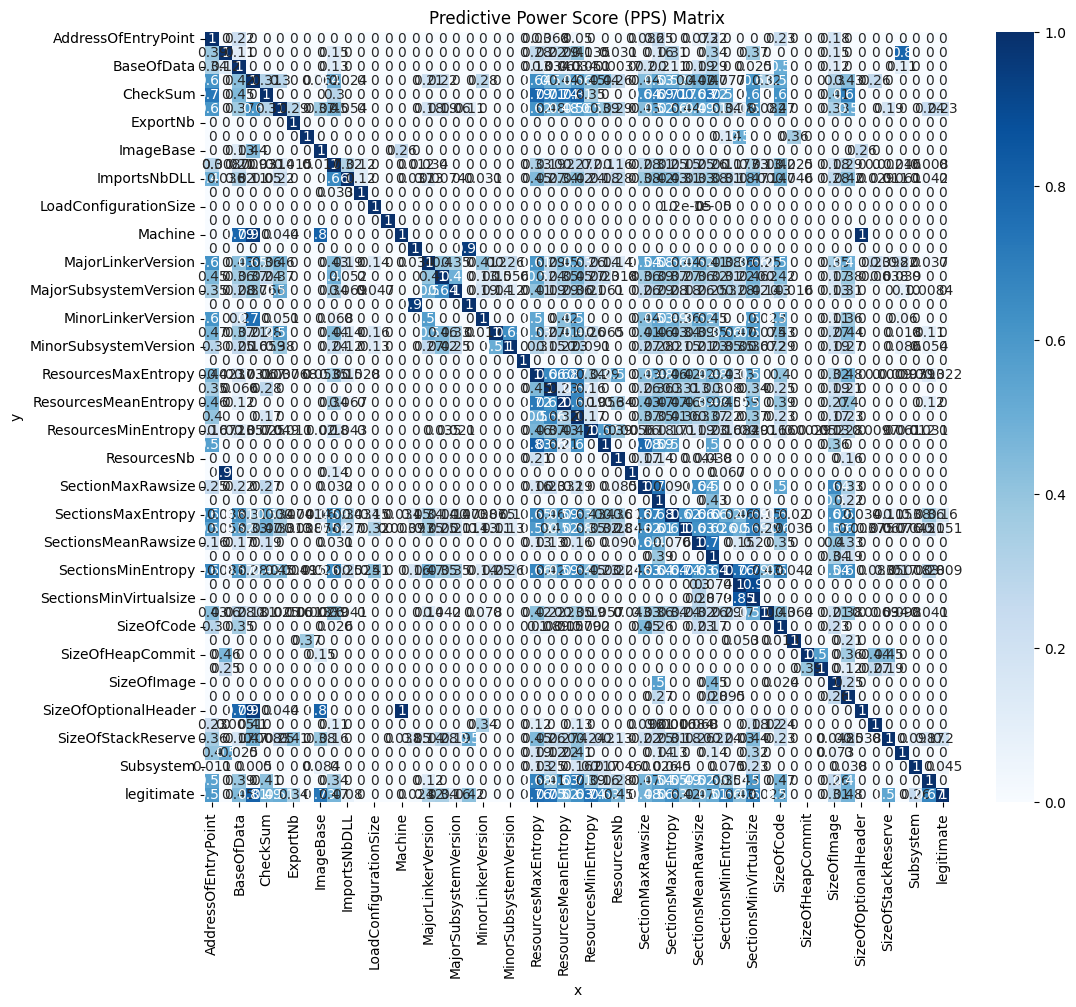

In [4]:
# Υπολογισμός PPS matrix
# Κρατάω μόνο αριθμητικές στήλες
df_num = dataset.select_dtypes(include=['int64','float64'])

# Μικρότερο δείγμα για ταχύτερη εκτέλεση
df_sample = df_num.sample(5000, random_state=42) if len(df_num) > 5000 else df_num

# Υπολογισμός PPS matrix
pps_matrix = pps.matrix(df_sample)

# Pivot για heatmap
pps_heatmap = pps_matrix.pivot(columns='x', index='y', values='ppscore')

# Οπτικοποίηση
plt.figure(figsize=(12,10))
sns.heatmap(pps_heatmap, annot=True, cmap="Blues", vmin=0, vmax=1)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()


In [5]:
# Φιλτράρω τον πίνακα PPS για να κρατήσω μόνο τις μεταβλητές που προβλέπουν το 'legitimate'
pps_target = pps_matrix[pps_matrix['y'] == 'legitimate']

# Ταξινόμηση κατά φθίνουσα προγνωστική ισχύ
pps_target_sorted = pps_target.sort_values(by='ppscore', ascending=False)

# Εμφάνιση των κορυφαίων χαρακτηριστικών
print("Μεταβλητές με υψηλή προγνωστική ικανότητα για το 'legitimate':")
print(pps_target_sorted[['x', 'ppscore']])


Μεταβλητές με υψηλή προγνωστική ικανότητα για το 'legitimate':
                                x   ppscore
3024                   legitimate  1.000000
164               Characteristics  0.809311
2694          ResourcesMaxEntropy  0.761615
2859             ResourcesMaxSize  0.746041
2639          ResourcesMinEntropy  0.741834
659                     ImageBase  0.725568
2969       VersionInformationSize  0.672612
2199       SectionsMinVirtualsize  0.670813
1869           SectionsMinEntropy  0.658024
2749            ResourcesMeanSize  0.632558
1924           SectionsMaxEntropy  0.630904
2804             ResourcesMinSize  0.626044
494           AddressOfEntryPoint  0.590494
2254        SectionMaxVirtualsize  0.558844
1429           SizeOfStackReserve  0.538290
2584         ResourcesMeanEntropy  0.516296
329                    SizeOfCode  0.508899
2144      SectionsMeanVirtualsize  0.507422
1374           DllCharacteristics  0.505371
1264                     CheckSum  0.487529
2089         